In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
import os
from tqdm import tqdm

In [34]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [10]:
PATH = Path('../data/')

In [11]:
! ls {PATH}/camvid

codes.txt  images  labels  valid.txt


In [20]:
path_img = PATH/'camvid/images'
path_label = PATH/'camvid/labels'

In [22]:
fnames = get_image_files(path_img)
print(fnames[:3])

[PosixPath('../data/camvid/images/0016E5_05910.png'), PosixPath('../data/camvid/images/Seq05VD_f02370.png'), PosixPath('../data/camvid/images/0001TP_007140.png')]


In [23]:
label_fnames = get_image_files(path_label)
print(label_fnames[:3])

[PosixPath('../data/camvid/labels/0016E5_05130_P.png'), PosixPath('../data/camvid/labels/0006R0_f03720_P.png'), PosixPath('../data/camvid/labels/0006R0_f03660_P.png')]


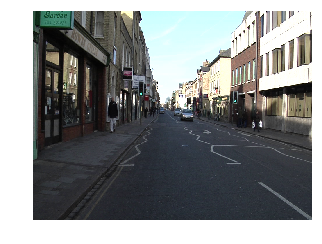

In [24]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

In [27]:
get_y_fn = lambda x: path_label/f'{x.stem}_P{x.suffix}'

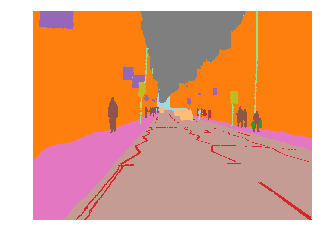

In [28]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)

In [30]:
codes = np.loadtxt(PATH/'camvid/codes.txt', dtype=str); codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [38]:
open(PATH/'camvid/valid.txt').readlines()[:5]

['0016E5_07959.png\n',
 '0016E5_07961.png\n',
 '0016E5_07963.png\n',
 '0016E5_07965.png\n',
 '0016E5_07967.png\n']

# Dataset

In [35]:
src_size = np.array(mask.shape[1:])
size = src_size//2

free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200: bs=8
else:           bs=4
print(f"using bs={bs}, have {free}MB of GPU RAM free")

using bs=4, have 7939MB of GPU RAM free


In [41]:
src = (SegmentationItemList.from_folder(path_img)
       .split_by_fname_file('../valid.txt')
       .label_from_func(get_y_fn, classes=codes))

In [42]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

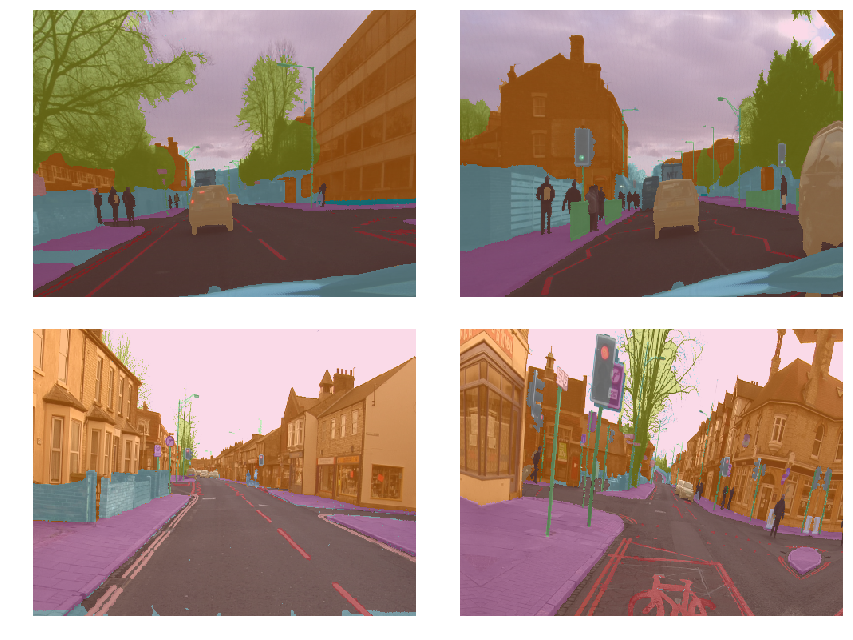

In [43]:
data.show_batch(rows=3, figsize=(12,9))